In [71]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Imports

In [72]:
import sys
sys.executable

'/Users/tudorl/Documents/workspace/personal/dtreeviz/venv/bin/python'

In [73]:
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")

import sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import xgboost as xgb
from xgboost import plot_importance, plot_tree, plotting

from dtreeviz import trees 
from dtreeviz import treeviz

import graphviz
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

import pandas as pd
import numpy as np
from dtreeviz.models.shadow_decision_tree import ShadowDecTree3
from dtreeviz.models.xgb_decision_tree import ShadowXGBDTree
from dtreeviz import treeviz
from dtreeviz import exceptions

In [74]:
pd.options.display.max_rows = 999

# Train

In [75]:
random_state = 1234
dataset = pd.read_csv("../data/titanic/titanic.csv")
# Fill missing values for Age
dataset.fillna({"Age":dataset.Age.mean()}, inplace=True)
# Encode categorical variables
dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes
dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"

In [76]:
dtrain = xgb.DMatrix(dataset[features], dataset[target])

In [77]:
params = {"max_depth":3, "eta":0.05, "objective":"binary:logistic", "subsample":1}
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=8)

In [78]:
xgb_model.trees_to_dataframe().query("Tree == 0")

,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover
0,0,0,0-0,Sex_label,1.00,0-1,0-2,0-1,246.604279,222.75
1,0,1,0-1,Pclass,3.00,0-3,0-4,0-3,60.127525,78.50
2,0,2,0-2,Cabin_label,4.00,0-5,0-6,0-5,29.516968,144.25
3,0,3,0-3,Leaf,NaN,NaN,NaN,NaN,0.087356,42.50
4,0,4,0-4,Fare,23.35,0-7,0-8,0-7,17.870434,36.00
5,0,5,0-5,Age,3.50,0-9,0-10,0-9,14.429703,118.25
6,0,6,0-6,Age,17.50,0-11,0-12,0-11,8.358520,26.00
7,0,7,0-7,Leaf,NaN,NaN,NaN,NaN,0.017355,29.25
8,0,8,0-8,Leaf,NaN,NaN,NaN,NaN,-0.067742,6.75
9,0,9,0-9,Leaf,NaN,NaN,NaN,NaN,0.022222,3.50


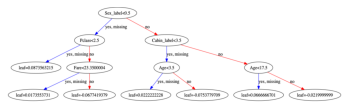

In [10]:
# rcParams['figure.figsize'] = 50,30
plot_tree(xgb_model)

# save the model

In [11]:
import joblib
# joblib.dump(xgb_model, "xgb_model")

# Init shadow tree

In [79]:
d = dataset[features+ [target]].iloc[:800]
d_matrix = xgb.DMatrix(d)

In [80]:
xgb_shadow = ShadowXGBDTree(xgb_model, 1, d[features], d[target], features, target, class_names=[0, 1])

In [69]:
a = True

In [70]:
type(a)

bool

# Parameters meaning
- cover https://stackoverflow.com/questions/33520460/how-is-xgboost-cover-calculated
- https://rdrr.io/cran/xgboost/man/xgb.model.dt.tree.html
- https://eli5.readthedocs.io/en/latest/tutorials/index.html

## left, right children

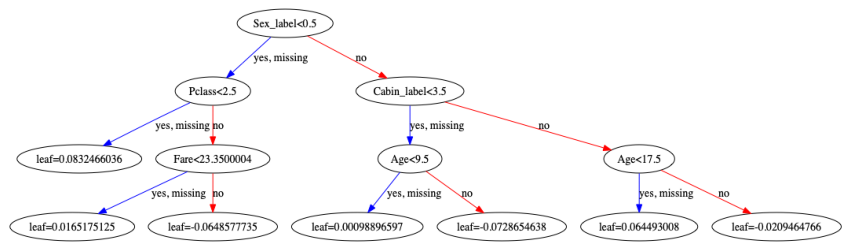

In [14]:
rcParams['figure.figsize'] = 15,10
plot_tree(xgb_model, num_trees=1)

In [15]:
[node.id for node in xgb_shadow.internal]

[4, 1, 5, 6, 2, 0]

In [16]:
[node.id for node in xgb_shadow.leaves]

[3, 7, 8, 9, 10, 11, 12]

## Node split/threshold

In [17]:
??plot_tree

In [18]:
xgb_model.get_dump(dump_format="dot")[1]

'digraph {\n    graph [ rankdir=TB ]\n\n    0 [ label="Sex_label<0.5" ]\n    0 -> 1 [label="yes, missing" color="#0000FF"]\n    0 -> 2 [label="no" color="#FF0000"]\n\n    1 [ label="Pclass<2.5" ]\n    1 -> 3 [label="yes, missing" color="#0000FF"]\n    1 -> 4 [label="no" color="#FF0000"]\n\n    3 [ label="leaf=0.0832466036" ]\n\n    4 [ label="Fare<23.3500004" ]\n    4 -> 7 [label="yes, missing" color="#0000FF"]\n    4 -> 8 [label="no" color="#FF0000"]\n\n    7 [ label="leaf=0.0165175125" ]\n\n    8 [ label="leaf=-0.0648577735" ]\n\n    2 [ label="Cabin_label<3.5" ]\n    2 -> 5 [label="yes, missing" color="#0000FF"]\n    2 -> 6 [label="no" color="#FF0000"]\n\n    5 [ label="Age<9.5" ]\n    5 -> 9 [label="yes, missing" color="#0000FF"]\n    5 -> 10 [label="no" color="#FF0000"]\n\n    9 [ label="leaf=0.00098896597" ]\n\n    10 [ label="leaf=-0.0728654638" ]\n\n    6 [ label="Age<17.5" ]\n    6 -> 11 [label="yes, missing" color="#0000FF"]\n    6 -> 12 [label="no" color="#FF0000"]\n\n    11

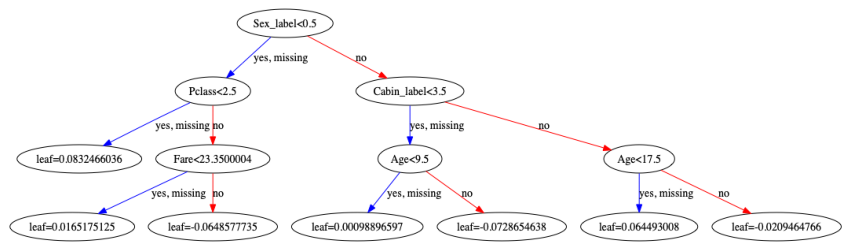

In [81]:
rcParams['figure.figsize'] = 15,10
plot_tree(xgb_model, num_trees=1)

In [87]:
??xgb_model.get_dump

In [85]:
xgb_model.get_dump(dump_format="text")[1]

'0:[Sex_label<1] yes=1,no=2,missing=1\n\t1:[Pclass<3] yes=3,no=4,missing=3\n\t\t3:leaf=0.0832466036\n\t\t4:[Fare<23.3500004] yes=7,no=8,missing=7\n\t\t\t7:leaf=0.0165175125\n\t\t\t8:leaf=-0.0648577735\n\t2:[Cabin_label<4] yes=5,no=6,missing=5\n\t\t5:[Age<9.5] yes=9,no=10,missing=9\n\t\t\t9:leaf=0.00098896597\n\t\t\t10:leaf=-0.0728654638\n\t\t6:[Age<17.5] yes=11,no=12,missing=11\n\t\t\t11:leaf=0.064493008\n\t\t\t12:leaf=-0.0209464766\n'

In [82]:
xgb_model.trees_to_dataframe().query(f"Tree ==1")

,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover
13,1,0,1-0,Sex_label,1.00,1-1,1-2,1-1,222.941849,222.490677
14,1,1,1-1,Pclass,3.00,1-3,1-4,1-3,54.640900,78.409081
15,1,2,1-2,Cabin_label,4.00,1-5,1-6,1-5,26.821884,144.081589
16,1,3,1-3,Leaf,NaN,NaN,NaN,NaN,0.083247,42.419022
17,1,4,1-4,Fare,23.35,1-7,1-8,1-7,16.328136,35.990059
18,1,5,1-5,Age,9.50,1-9,1-10,1-9,13.453308,118.086716
19,1,6,1-6,Age,17.50,1-11,1-12,1-11,7.758327,25.994875
20,1,7,1-7,Leaf,NaN,NaN,NaN,NaN,0.016518,29.247799
21,1,8,1-8,Leaf,NaN,NaN,NaN,NaN,-0.064858,6.742262
22,1,9,1-9,Leaf,NaN,NaN,NaN,NaN,0.000989,6.495310


In [26]:
xgb_shadow._get_column_value("Split")

array([  1.        ,   3.        ,   4.        ,          nan,
        23.3500004 ,   3.5       ,  17.5       ,   2.        ,
                nan,  20.8250008 ,  13.        ,          nan,
        43.        ,  13.9354496 ,  10.8249998 ,          nan,
                nan,  24.2124996 ,  54.2479019 ,   7.9000001 ,
        16.        ,          nan,  15.3729    ,   7.98750019,
        17.5999985 ,          nan,          nan,          nan,
        58.9375    ,          nan, 101.        ,          nan,
        47.5       ,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan])

In [27]:
[node.split() for node in xgb_shadow.leaves], [node.split() for node in xgb_shadow.internal]

([-2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2],
 [15.3729,
  13.9354496,
  7.98750019,
  17.5999985,
  10.8249998,
  2.0,
  23.3500004,
  3.0,
  20.8250008,
  24.2124996,
  58.9375,
  54.2479019,
  13.0,
  3.5,
  101.0,
  7.9000001,
  47.5,
  16.0,
  43.0,
  17.5,
  4.0,
  1.0])

In [28]:
xgb_shadow.get_node_split(0)

1.0

## Node feature

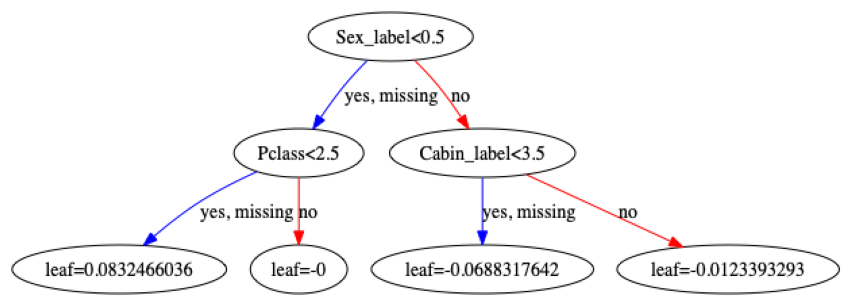

In [20]:
rcParams['figure.figsize'] = 15,10
plot_tree(xgb_model, num_trees=1)

In [165]:
xgb_model.feature_names

['Pclass', 'Age', 'Fare', 'Sex_label', 'Cabin_label', 'Embarked_label']

In [166]:
[(node.id, node.feature()) for node in xgb_shadow.leaves], [(node.id, node.feature()) for node in xgb_shadow.internal]

([(3, -2), (7, -2), (8, -2), (9, -2), (10, -2), (11, -2), (12, -2)],
 [(4, 2), (1, 0), (5, 1), (6, 1), (2, 4), (0, 3)])

## node to samples

In [168]:
xgb_shadow.get_node_samples()

defaultdict(list,
            {10: [0, 4, 5, 12, 13, 17],
             5: [0, 4, 5, 7, 12, 13, 16, 17],
             2: [0, 4, 5, 6, 7, 12, 13, 16, 17],
             0: [0,
              1,
              2,
              3,
              4,
              5,
              6,
              7,
              8,
              9,
              10,
              11,
              12,
              13,
              14,
              15,
              16,
              17,
              18,
              19],
             3: [1, 3, 9, 11, 15],
             1: [1, 2, 3, 8, 9, 10, 11, 14, 15, 18, 19],
             7: [2, 8, 10, 14, 18, 19],
             4: [2, 8, 10, 14, 18, 19],
             12: [6],
             6: [6],
             9: [7, 16]})

In [171]:
xgb_shadow.get_node_samples()[0]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

## Node nsample

In [173]:
[(node.id, node.nsamples()) for node in xgb_shadow.leaves], [(node.id, node.nsamples()) for node in xgb_shadow.internal]


([(3, 5), (7, 6), (8, 0), (9, 2), (10, 6), (11, 0), (12, 1)],
 [(4, 6), (1, 11), (5, 8), (6, 1), (2, 9), (0, 20)])

## n_sample_classes

In [201]:
[node.n_sample_classes() for node in xgb_shadow.leaves]

[[0, 5], [2, 4], [0, 0], [2, 0], [5, 1], [0, 0], [1, 0]]

# Visualisations classifier

## viz_leaf_samples

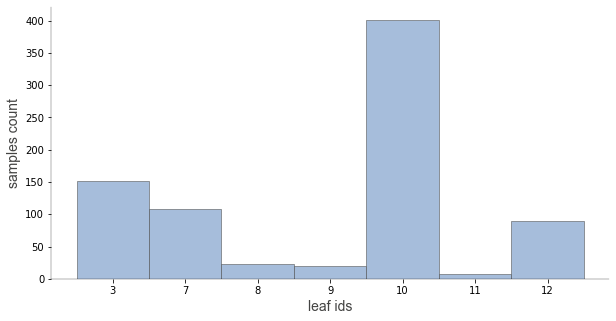

In [19]:
treeviz.viz_leaf_samples(xgb_model, d[features], d[target], features, target, class_names=[0, 1], tree_index=1)

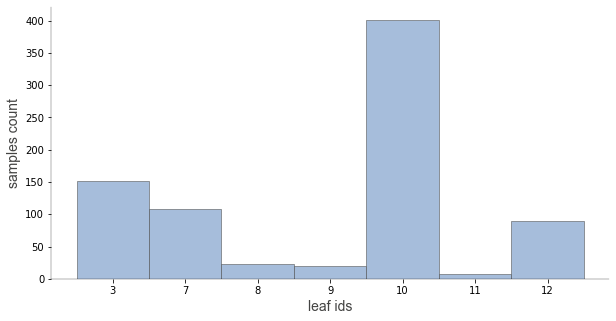

In [20]:
treeviz.viz_leaf_samples(xgb_shadow)

## ctreeviz_leaf_samples

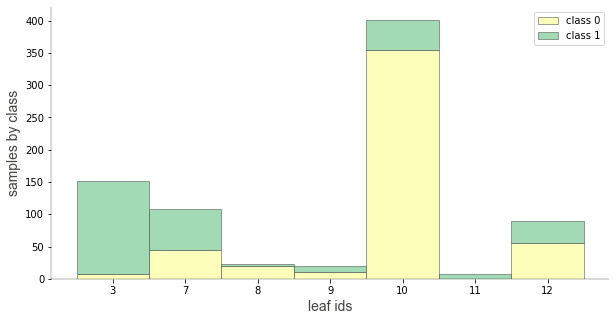

In [21]:
treeviz.ctreeviz_leaf_samples(xgb_model, d[features], d[target], features, target, class_names=[0, 1], tree_index=1  )

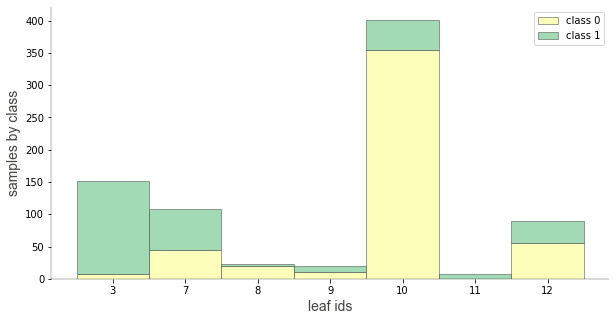

In [22]:
treeviz.ctreeviz_leaf_samples(xgb_shadow)

## dtreeviz

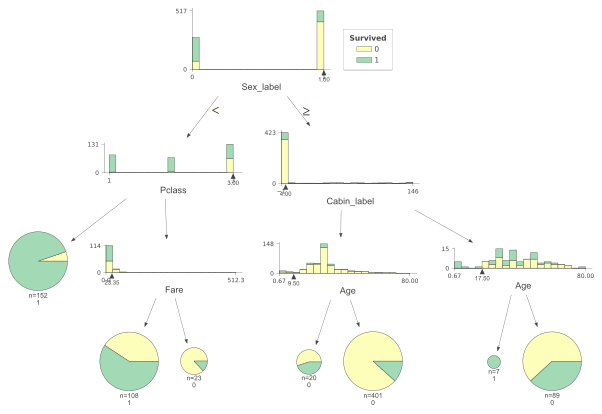

In [23]:
treeviz.dtreeviz(xgb_model, d[features], d[target], features, target, class_names=[0, 1], tree_index=1)

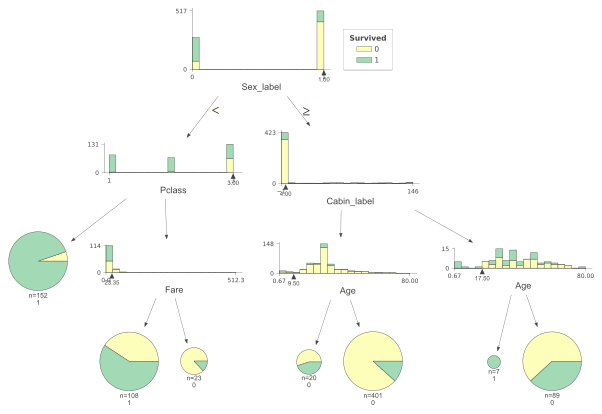

In [24]:
treeviz.dtreeviz(xgb_shadow)

## describe_node_sample

In [25]:
d[features]

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label
0,3,22.000000,7.2500,1,-1,2
1,1,38.000000,71.2833,0,81,0
2,3,26.000000,7.9250,0,-1,2
3,1,35.000000,53.1000,0,55,2
4,3,35.000000,8.0500,1,-1,2
5,3,29.699118,8.4583,1,-1,1
6,1,54.000000,51.8625,1,129,2
7,3,2.000000,21.0750,1,-1,2
8,3,27.000000,11.1333,0,-1,2
9,2,14.000000,30.0708,0,-1,0


In [27]:
treeviz.describe_node_sample(xgb_model, 1, d[features], feature_names=features, tree_index=1)

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label
count,283.000000,283.000000,283.000000,283.0,283.000000,283.000000
mean,2.173145,27.953908,45.067698,0.0,23.151943,1.420495
std,0.851607,12.760286,59.964198,0.0,42.797414,0.844173
min,1.000000,0.750000,6.750000,0.0,-1.000000,-1.000000
25%,1.000000,21.000000,11.133300,0.0,-1.000000,1.000000
50%,2.000000,29.699118,22.358300,0.0,-1.000000,2.000000
75%,3.000000,34.500000,55.450000,0.0,35.000000,2.000000
max,3.000000,63.000000,512.329200,0.0,145.000000,2.000000


In [28]:
treeviz.describe_node_sample(xgb_shadow, 1)

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label
count,283.000000,283.000000,283.000000,283.0,283.000000,283.000000
mean,2.173145,27.953908,45.067698,0.0,23.151943,1.420495
std,0.851607,12.760286,59.964198,0.0,42.797414,0.844173
min,1.000000,0.750000,6.750000,0.0,-1.000000,-1.000000
25%,1.000000,21.000000,11.133300,0.0,-1.000000,1.000000
50%,2.000000,29.699118,22.358300,0.0,-1.000000,2.000000
75%,3.000000,34.500000,55.450000,0.0,35.000000,2.000000
max,3.000000,63.000000,512.329200,0.0,145.000000,2.000000


## explain_prediction_path

In [29]:
X = dataset[features].iloc[10]

In [30]:
X

Pclass              3.0
Age                 4.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Name: 10, dtype: float64

In [31]:
treeviz.explain_prediction_path(xgb_shadow, X, explanation_type="plain_english")

3.0 <= Pclass 
Fare < 23.35
Sex_label < 1.0


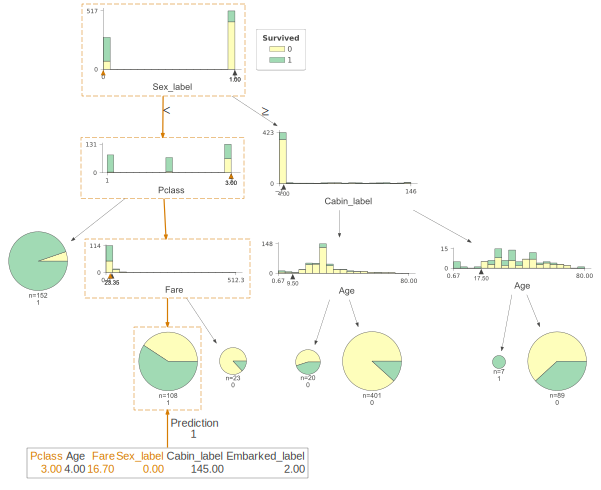

In [32]:
treeviz.dtreeviz(xgb_model, d[features], d[target], features, target, class_names=[0, 1], tree_index=1, show_just_path=False, X=X)

# Regressor

## Visualisations regressor

In [33]:
features_reg = ["Pclass", "Survived", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target_reg = "Age"

In [34]:
dtrain_reg = xgb.DMatrix(dataset[features_reg], dataset[target_reg])
params_reg = {"max_depth":3, "eta":0.05, "objective":"reg:squarederror", "subsample":1}
xgb_model_reg = xgb.train(params=params_reg, dtrain=dtrain_reg, num_boost_round=8)

In [35]:
xgb_shadow_reg = ShadowXGBDTree(xgb_model_reg, 1, dataset[features_reg], dataset[target_reg], features_reg, target_reg)

### dtreeviz

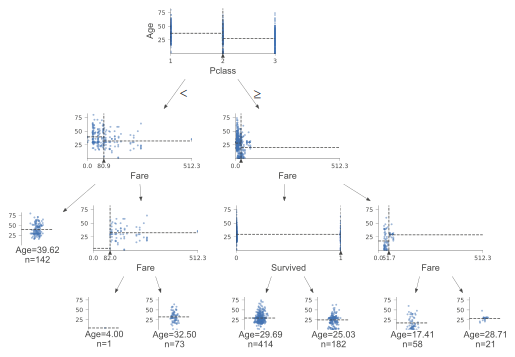

In [36]:
treeviz.dtreeviz(xgb_shadow_reg)

### viz_leaf_samples

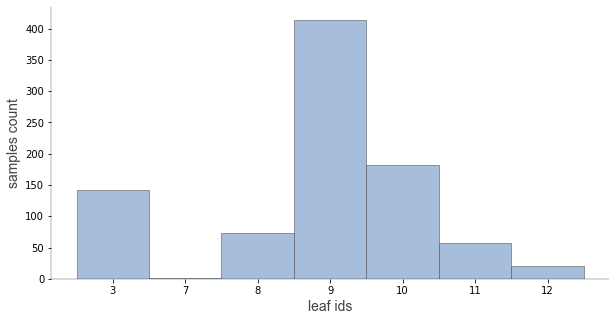

In [37]:
treeviz.viz_leaf_samples(xgb_shadow_reg)

### describe_node_sample

In [38]:
treeviz.describe_node_sample(xgb_shadow_reg, 9)

,Pclass,Survived,Fare,Sex_label,Cabin_label,Embarked_label
count,414.000000,414.0,414.000000,414.000000,414.000000,414.000000
mean,2.792271,0.0,11.021476,0.855072,1.966184,1.678744
std,0.406173,0.0,5.698663,0.352454,20.066568,0.664333
min,2.000000,0.0,0.000000,0.000000,-1.000000,0.000000
25%,3.000000,0.0,7.750000,1.000000,-1.000000,2.000000
50%,3.000000,0.0,8.050000,1.000000,-1.000000,2.000000
75%,3.000000,0.0,13.000000,1.000000,-1.000000,2.000000
max,3.000000,0.0,27.750000,1.000000,145.000000,2.000000


### explain_prediction_path

In [39]:
X_reg = dataset[features_reg].iloc[10]
X_reg

Pclass              3.0
Survived            1.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Name: 10, dtype: float64

In [40]:
treeviz.explain_prediction_path(xgb_shadow_reg, X_reg, explanation_type="plain_english")

2.0 <= Pclass 
1.0 <= Survived 
Fare < 27.83


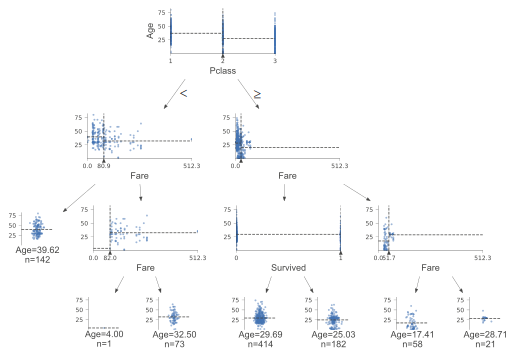

In [41]:
treeviz.dtreeviz(xgb_shadow_reg)

### viz_leaf_target

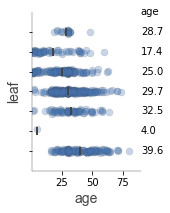

In [42]:
treeviz.viz_leaf_target(xgb_shadow_reg)

### rtreeviz_univar

In [43]:
features_reg_univar = ["Pclass"]
target_reg_univar = "Age"

In [45]:
dtrain_reg_univar = xgb.DMatrix(dataset[features_reg_univar], dataset[target_reg_univar])
params_reg_univar = {"max_depth":3, "eta":0.05, "objective":"reg:squarederror", "subsample":1}
xgb_model_reg_univar = xgb.train(params=params_reg_univar, dtrain=dtrain_reg_univar, num_boost_round=8)

In [64]:
xgb_shadow_reg_univar = ShadowXGBDTree(xgb_model_reg_univar, 1, dataset[features_reg_univar], dataset[target_reg_univar], features_reg_univar, target_reg_univar)


In [52]:
import json

In [62]:
json.loads(xgb_model_reg_univar.save_config())["learner"]["gradient_booster"]["updater"]["prune"]["train_param"]["max_depth"]

'3'

VisualisationNotYetSupportedError: get_min_samples_leaf() is not implemented yet for XGBoost

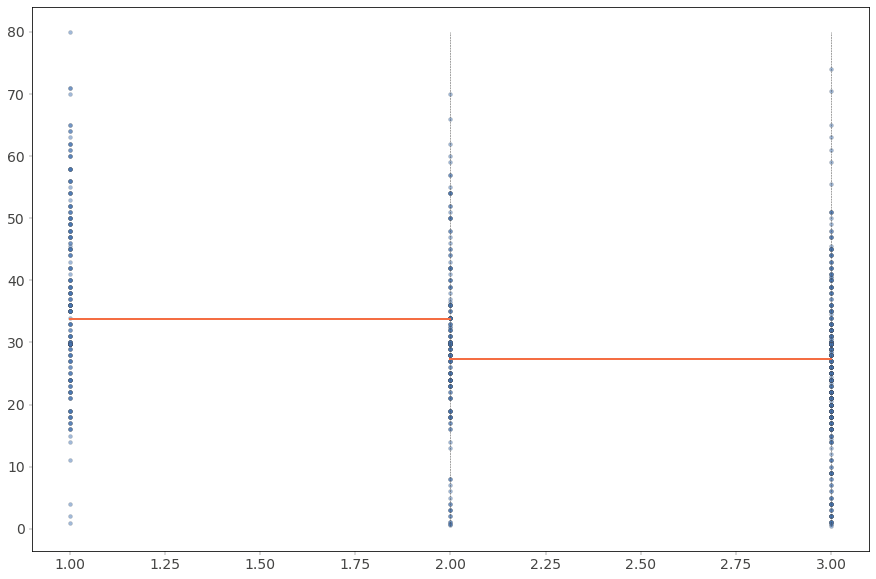

In [66]:
treeviz.rtreeviz_univar(xgb_shadow_reg_univar, dataset[features_reg_univar], dataset[target_reg_univar], features_reg_univar, target_reg_univar)


## Unit test
The following code will help us during unit testing

In [21]:
features_reg_test = ["Pclass", "Survived", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target_reg_test = "Age"

In [25]:
dataset_reg_test = pd.read_csv("../testing/dtreeviz/models/fixtures/dataset.csv")

In [27]:
dtrain_reg_test = xgb.DMatrix(dataset_reg_test[features_reg_test], dataset_reg_test[target_reg_test])
params_reg_test = {"max_depth":3, "eta":0.05, "objective":"reg:squarederror", "subsample":1}
xgb_model_reg_test = xgb.train(params=params_reg, dtrain=dtrain_reg_test, num_boost_round=8)

### Save the model

In [30]:
import joblib

In [34]:
#joblib.dump(xgb_model_reg_test, "/Users/tudorl/Documents/workspace/personal/dtreeviz/testing/dtreeviz/models/fixtures/xgb_model_regressor.joblib")



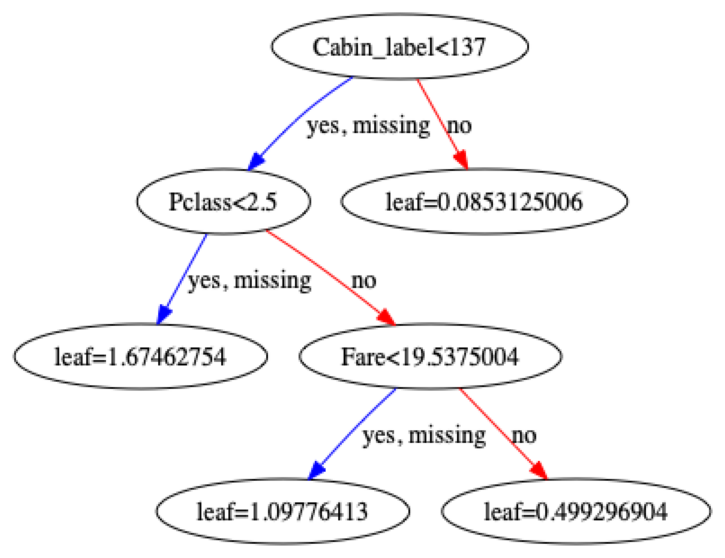

In [59]:
rcParams['figure.figsize'] = 15,10
plot_tree(xgb_model_reg_test, num_trees=1)

In [60]:
node_data = dataset_reg_test.query("Cabin_label < 137 and Pclass >= 2.5 and Fare >= 19.5375004")
node_data

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label,Survived
7,3,2.0,21.075,1,-1,2,0
13,3,39.0,31.275,1,-1,2,0
16,3,2.0,29.125,1,-1,1,0


In [61]:
np.mean(node_data["Age"])

14.333333333333334